# Summary Report


This notebook performs model performance of the two models investigated and then compares performance on production data




# TODO


Was there an attempt to isolate the read/write unit tests from production models and logs? I think i have done this


In [1]:
import os
from ast import literal_eval
import datetime
import requests
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

import model
import data_ingestion as di



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import median_absolute_error, r2_score


## Model selection

The baseline model investigated was linear ridge regression and gradient booster regression.

Linear ridge regression was chosen as the baseline for it's ability to set the weight of non-useful features to 0.

Gradient booster regression is an ensemble method that was chosen to identify a more complex relationship. This was chosen following the EDA analysis which indicated a weak linear relationship between features and projected revenue.

For each machine learning model we train a separate model for each of the top 10 countries by revenue, in addition to a dataframe consisting of all information. A separate model for each country was seen as necessary by observing the different relationships during EDA.

In [2]:
trainingData = "cs-train"

model_comparison = {}
model_comparison['ridge'] = model.train_model(trainingData, 'ridge')
model_comparison['boost'] = model.train_model(trainingData, 'boost')

### Model comparison

During training we capture the root mean squared error of a train/test split.

We observe the boost model perform significantly better for the categories 'all' and 'United Kingdom'. From EDA we know that the performance on the UK will have a large effect on the performance of all due to the size of UK compared to other countries.

For other countries we observe that boost records a slightly lower RMSE than ridge showing the ensemble method can predict future revenue more accurately.

Text(0, 0.5, 'Model RMSE of projected revenue')

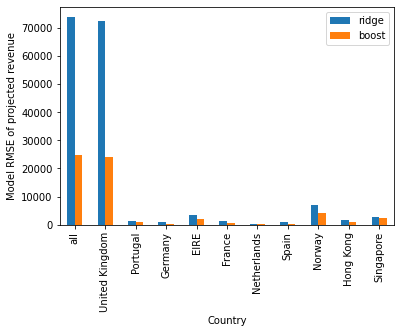

In [3]:
rmse_comparison = pd.DataFrame(model_comparison)
rmse_comparison.plot.bar()

plt.xlabel('Country')
plt.ylabel('Model RMSE of projected revenue')

## Model performance on production data on dockerised container

*** Important *** At this stage make sure that the flask application app.py is running.

The flask application can be run on the terminal using the instructions in the readme. Assuming you're running the juptyer notebook through Docker you can run 'docker exec -it capstone python app.py'

In [4]:
# Run tests
!python run-tests.py


......../opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:319: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:524: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174:

/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python

/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python

/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python

/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/conda/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:174: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
... saving test versio

Calculate the projected revenue from the production data (exclude last 30 days) and compare model performance on new dataset. 

Use flask application to calculated projected revenues from models.

In [5]:
# Source of truth
productionData = "cs-production"
prod_ts_df = di.getTimeSeriesDf(productionData, True, 'cs-production-dataframes-test', load_dataframes=True)

In [6]:
# use flask application to create projections
port = 8080

ts_results = {}

for country in prod_ts_df.keys():
    ts_results[country] = {'ridge':[], 'boost':[]}
    for model_key in ['ridge', 'boost']:
        for date in prod_ts_df[country].index:
            day = date.strftime('%d')
            month = date.strftime('%m')
            year = date.strftime('%Y')
            query={'day': day, 'month': month, 'year':year, 'country':country, 'model_key': model_key}
            request_json = {'query':query, 'type':'dict'}
            r = requests.post('http://127.0.0.1:{}/predict'.format(port), json=request_json)
            response = literal_eval(r.text)['y_pred'][0]

            ts_results[country][model_key].append(response)

In [7]:
rmse_by_country = {}
for country in prod_ts_df.keys():
    if prod_ts_df[country].empty:
        continue
    rmse_by_country[country] = {}
    for model_key in ['ridge', 'boost']:
        rmse_by_country[country][model_key] = mean_squared_error(prod_ts_df[country].target_revenue, ts_results[country][model_key], squared = False) 
        


## Comparison of two models across all countries

Against production data we observe the disrepency between the two models to have decreased. This is most prominent for the UK dataset. Generally the boost model records a lower RMSE than ridge (outside Germany).

Outside the UK both were able to project revenues with low RMSE. We investigate the UK to understand model drift.

Text(0, 0.5, 'Model RMSE of projected revenue')

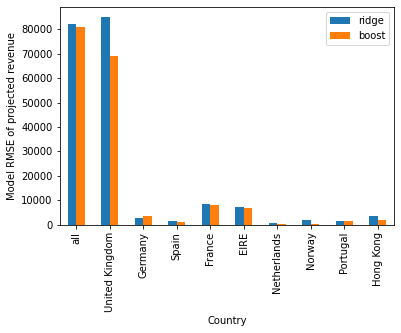

In [8]:
pd.DataFrame(rmse_by_country).T.plot.bar()

plt.xlabel('Country')
plt.ylabel('Model RMSE of projected revenue')

### Plot predictions for UK by time


We observe the projections by boost were largely accurate until midway September. There appears to be some model drift that occurst just after September where the boost predictions become inaccurate.

<AxesSubplot:xlabel='invoice_date'>

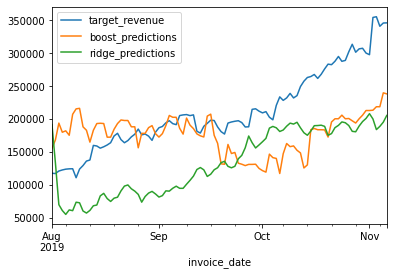

In [9]:
country = 'United Kingdom'
ts_uk = prod_ts_df[country]
ts_uk['boost_predictions'] = ts_results[country]['boost']
ts_uk['ridge_predictions'] = ts_results[country]['ridge']

ts_uk[['target_revenue', 'boost_predictions', 'ridge_predictions']].plot()



